In [1]:
# Setting the begining
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
Mouse_metadatapath = "/Users/siyuanliang/BootCamp_University/ThePowerofPlots/Mouse_metadata.csv"
Study_resultspath ="/Users/siyuanliang/BootCamp_University/ThePowerofPlots/Study_results.csv"

# Read the mouse data and the study results
Mouse_metadata = pd.read_csv(Mouse_metadatapath)
Study_results = pd.read_csv(Study_resultspath)

# Combine the data into a single dataset
newdf = Mouse_metadata.merge(Study_results, how='right')

# Display the data table for preview
newdf



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [2]:
# Checking the number of mice.
Mouse = newdf["Mouse ID"].unique()
Mousenumber = len(Mouse)



In [3]:
 # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouseID = newdf[newdf["Mouse ID"].duplicated()]
NEWLIST = duplicate_mouseID[["Mouse ID","Timepoint"]]
NEWLIST

,Mouse ID,Timepoint
137,g989,0
250,a275,5
251,w575,5
252,x822,5
253,l509,5
...,...,...
1888,r944,45
1889,u364,45
1890,p438,45
1891,x773,45


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouseID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,Propriva,Female,21,26,0,45.000000,0
250,a275,Ceftamin,Female,20,28,5,46.795257,0
251,w575,Zoniferol,Female,16,28,5,48.913860,1
252,x822,Ceftamin,Male,3,29,5,45.671104,1
253,l509,Capomulin,Male,17,21,5,45.851193,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [5]:
 # Checking the number of mice in the clean DataFrame.
len(duplicate_mouseID)

1644

# Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Summarylist = duplicate_mouseID[['Drug Regimen','Tumor Volume (mm3)']]
drugname = Summarylist.groupby(['Drug Regimen'])['Drug Regimen'].unique()

mean1 = Summarylist.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median1 = Summarylist.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance1 = Summarylist.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
standard1 = Summarylist.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem1 = Summarylist.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()


d1 = {'mean': mean1, 'median': median1, 'variance':variance1,'standard':standard1,'SEM':sem1}
df1 = pd.DataFrame(data=d1,index =drugname )

df1


,mean,median,variance,standard,SEM
Drug Regimen,,,,,
[Capomulin],40.148392,40.716428,25.434058,5.043219,0.352234
[Ceftamin],53.831559,52.847559,34.725752,5.892856,0.476409
[Infubinol],54.173160,53.244458,38.326085,6.190806,0.500497
[Ketapril],56.805521,56.098998,60.485143,7.777219,0.609159
[Naftisol],55.780565,54.234502,60.794406,7.797077,0.614496
[Placebo],55.481270,53.354528,55.762387,7.467422,0.597872
[Propriva],53.668609,52.663801,38.438982,6.199918,0.531639
[Ramicane],39.627674,39.769552,23.213127,4.818000,0.338157
[Stelasyn],55.644586,54.328317,53.476333,7.312751,0.583621


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mean2 = Summarylist.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg('mean')
median2 = Summarylist.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg('median')
variance2 = Summarylist.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg('var')
standard2 = Summarylist.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg('std')
sem2 = Summarylist.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg("sem")


d2 = {'mean': mean2, 'median': median2, 'variance':variance2,'standard':standard2,'SEM':sem2}
df2 = pd.DataFrame(data=d2,index =drugname )

df2


,mean,median,variance,standard,SEM
Drug Regimen,,,,,
[Capomulin],40.148392,40.716428,25.434058,5.043219,0.352234
[Ceftamin],53.831559,52.847559,34.725752,5.892856,0.476409
[Infubinol],54.173160,53.244458,38.326085,6.190806,0.500497
[Ketapril],56.805521,56.098998,60.485143,7.777219,0.609159
[Naftisol],55.780565,54.234502,60.794406,7.797077,0.614496
[Placebo],55.481270,53.354528,55.762387,7.467422,0.597872
[Propriva],53.668609,52.663801,38.438982,6.199918,0.531639
[Ramicane],39.627674,39.769552,23.213127,4.818000,0.338157
[Stelasyn],55.644586,54.328317,53.476333,7.312751,0.583621


#  Bar and Pie Charts

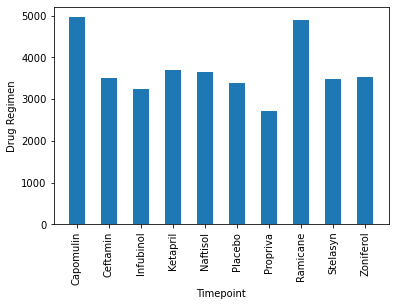

In [25]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
import matplotlib.pyplot as plt

BarPielist = duplicate_mouseID[['Drug Regimen','Timepoint']]

Y = BarPielist.groupby(['Drug Regimen'])["Timepoint"].sum()

X = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']


plt.bar(X,Y, width = 0.5)
plt.xticks(rotation = 90)
plt.xlabel("Timepoint")
plt.ylabel("Drug Regimen")
plt.show()



In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

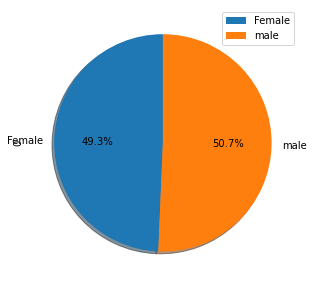

In [30]:
Femalenumber = (duplicate_mouseID['Sex']=='Female').agg('sum')
Femalenumberpercentage = Femalenumber / len(duplicate_mouseID) * 100

Malenumber = (duplicate_mouseID['Sex']=='Male').agg('sum')
Malenumberpercentage = Malenumber/len(duplicate_mouseID) * 100

# Generate a pie plot showing the distribution of female versus male mice using Pandas

labels = 'Female','male'

sizes = [Femalenumberpercentage, Malenumberpercentage]

df = pd.DataFrame({Femalenumberpercentage,
                   Malenumberpercentage},
                  index=['Female', 'male'])
plot = df.plot.pie(subplots=True,figsize=(5, 5),autopct='%1.1f%%',
                  shadow=True, startangle=90)

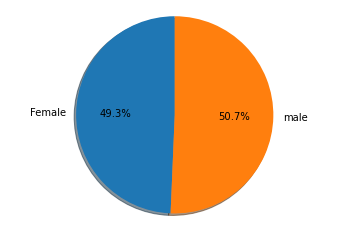

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Femalenumber = (duplicate_mouseID['Sex']=='Female').agg('sum')
Femalenumberpercentage = Femalenumber / len(duplicate_mouseID) * 100

Malenumber = (duplicate_mouseID['Sex']=='Male').agg('sum')
Malenumberpercentage = Malenumber/len(duplicate_mouseID) * 100

labels = 'Female','male'

sizes = [Femalenumberpercentage, Malenumberpercentage]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

#  Quartiles, Outliers and Boxplots

In [88]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
a = duplicate_mouseID.groupby(["Drug Regimen",'Mouse ID']).apply(lambda x: x.iloc[[0, -1]]).reset_index(drop=True)
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin = duplicate_mouseID[duplicate_mouseID['Drug Regimen'] == 'Capomulin'].groupby(["Mouse ID",'Drug Regimen']).sum()
Ramicane = duplicate_mouseID[duplicate_mouseID['Drug Regimen'] == 'Ramicane'].groupby(["Mouse ID",'Drug Regimen'])['Tumor Volume (mm3)'].sum()
Infubinol= duplicate_mouseID[duplicate_mouseID['Drug Regimen'] == 'Infubinol'].groupby(["Mouse ID",'Drug Regimen'])['Tumor Volume (mm3)'].sum()
Ceftamin = duplicate_mouseID[duplicate_mouseID['Drug Regimen'] == 'Ceftamin'].groupby(["Mouse ID",'Drug Regimen'])['Tumor Volume (mm3)'].sum()
#  Start by getting the last (greatest) timepoint for each mouse
Maxtimepoint = duplicate_mouseID.groupby(["Drug Regimen",'Mouse ID']).max()
# Capomulin
Merge this group df with the original dataframe to get the tumor volume at the last timepoint

a.to_csv('/Users/siyuanliang/Desktop/11.csv', sep='\t', encoding='utf-8')


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
Treatment = []

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#  Line and Scatter Plots


In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


# Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 

# for mouse weight and average tumor volume for the Capomulin regimen

